In [1]:
import tensorflow as tf
from tensorflow import keras
# YOUR CODE SHOULD START HERE
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')> ACCURACY_THRESHOLD):
      print("\nModel Reached %2.2f%% accuracy so cancelling training!" % (ACCURACY_THRESHOLD*100))
      self.model.stop_training = True
# YOUR CODE SHOULD END HERE

(training_images, training_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Normalize features, initialize callback
training_images = training_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1)  / 255.0
callbacks=myCallback()
print('training_images_with_chanels:', training_images.shape)
print('test_images_with_chanels:', test_images.shape)

training_images_with_chanels: (60000, 28, 28, 1)
test_images_with_chanels: (10000, 28, 28, 1)


In [2]:
print(tf.__version__)

2.9.2


In [3]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(28, 28, 1),
    kernel_size=4,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=4,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=4,
    filters=256,
    strides=1,
    activation=tf.keras.activations.relu,
))

model.add((tf.keras.layers.Flatten()
));

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));



model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
))

In [4]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

ACCURACY_THRESHOLD = .99
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)
# model fitting
history=model.fit(training_images, training_labels,
                  validation_data=(test_images, test_labels),
                  epochs=20, 
                  verbose=1,
                  callbacks=[early_stopping])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 8)         136       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 16)          2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 256)         65792     
                                                                 
 flatten (Flatten)           (None, 256)               0

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 8)         136       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 16)          2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 256)         65792     
                                                                 
 flatten (Flatten)           (None, 256)               0

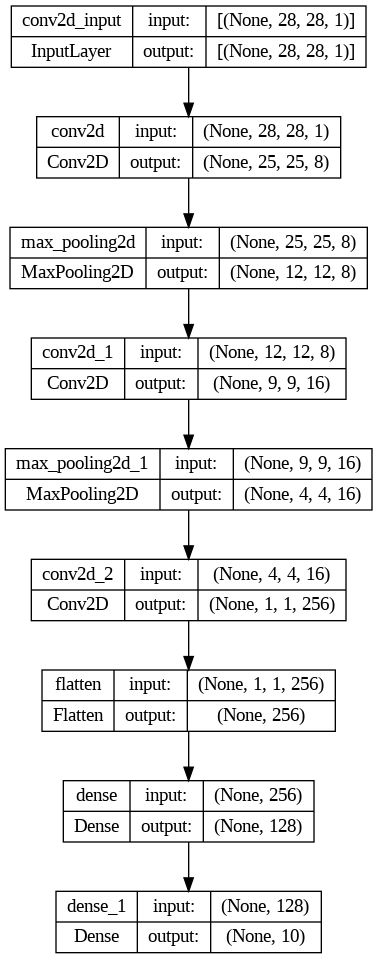

In [5]:
model.summary()
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [6]:
import numpy as np
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
print(predictions[0])
print(test_labels[0])

313/313 [==============================] - 3s 10ms/step
7
7


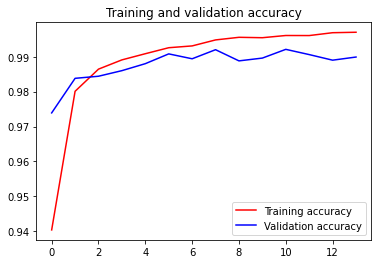

<Figure size 432x288 with 0 Axes>

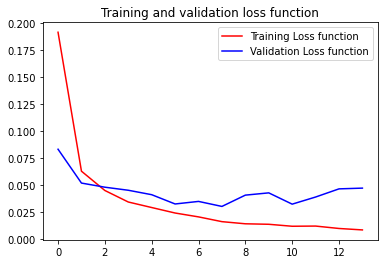

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
def summarize_diagnostics(history):
  acc = history.history['accuracy']
  loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(acc, 'r', label='Training accuracy')
  plt.plot(val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()
  plt.show()

  plt.plot(loss, 'r', label='Training Loss function')
  plt.plot(val_loss, 'b', label='Validation Loss function')
  plt.title('Training and validation loss function')
  plt.legend(loc=0)
  plt.figure()
  plt.show()
summarize_diagnostics(history)

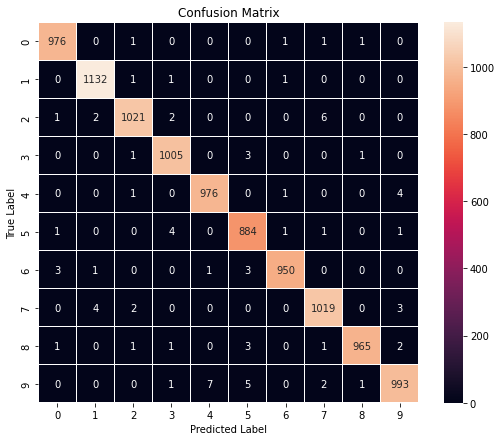

In [8]:
import seaborn as sn
confusion_matrix = tf.math.confusion_matrix(test_labels, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

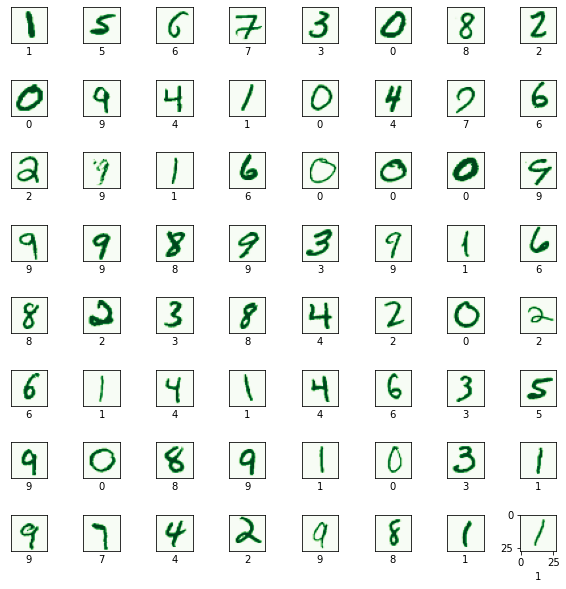

In [10]:
import math
numbers_to_display = 64
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 10))
random_num=np.random.randint(0,10000, size=numbers_to_display)
for plot_index in range(numbers_to_display):    
    predicted_label = predictions[random_num[plot_index]]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == test_labels[random_num[plot_index]] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(test_images[random_num[plot_index]].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()